## import resource

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

##1. 데이터 가져오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

## 2. 데이터 기본정보 탐색하기

* datetime: 시간별 날짜 + 타임스탬프  
* season:1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 
* hoiday: 휴일
* workingday:근무일 로 간주 되는지 여부 - 날이 주말도 휴일
* weather: 
    1. 맑음, 거의 없음 구름, 약간 흐림, 약간 흐림
    2. 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간 구름, 안개
    3. 약한 눈, 약한 비 + 뇌우 + 산발적 구름, 가벼운 비 + 산발적인 구름
    4. 큰 비 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 
* temp: 섭씨 온도
* atemp: 체감 온도
* humidity: 습도 - 상대 습도
* windspeed:  풍속
* casual: 등록 된 미등록 사용자 렌탈 횟수
* registerd: 등록 된 사용자 렌탈 시작
* count: 총 렌탈 횟수

In [ ]:
train.info() # 결손값은 없다는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
train.columns # columns 특성 확인

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,0,9.84,81,0.0000,3,13,16,2011,1,1,0,1,0,0,0,0,0,0,1
1,0,0,9.02,80,0.0000,8,32,40,2011,1,1,1,1,0,0,0,0,0,0,1
2,0,0,9.02,80,0.0000,5,27,32,2011,1,1,2,1,0,0,0,0,0,0,1
3,0,0,9.84,75,0.0000,3,10,13,2011,1,1,3,1,0,0,0,0,0,0,1
4,0,0,9.84,75,0.0000,0,1,1,2011,1,1,4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,7,329,336,2012,12,19,19,1,0,0,0,0,0,0,1
10882,0,1,14.76,57,15.0013,10,231,241,2012,12,19,20,1,0,0,0,0,0,0,1
10883,0,1,13.94,61,15.0013,4,164,168,2012,12,19,21,1,0,0,0,0,0,0,1
10884,0,1,13.94,61,6.0032,12,117,129,2012,12,19,22,1,0,0,0,0,0,0,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
train['holiday'].value_counts() # 휴일이 311일

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
train['workingday'].value_counts() # 일하는 날: 7,412일 / 일 안하는날: 3,474일

1    7412
0    3474
Name: workingday, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1b00e9c90>,
      dtype=object)

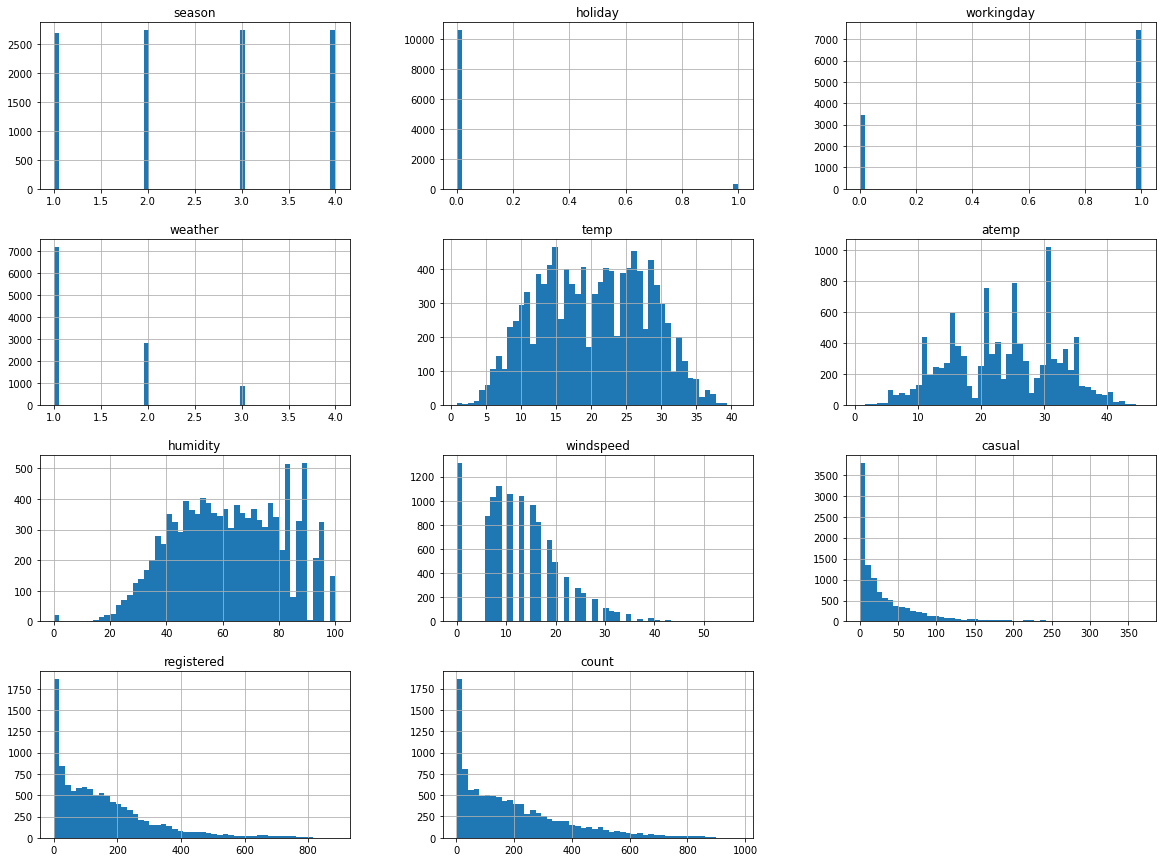

In [ ]:
train.hist(bins = 50, figsize = (20, 15))

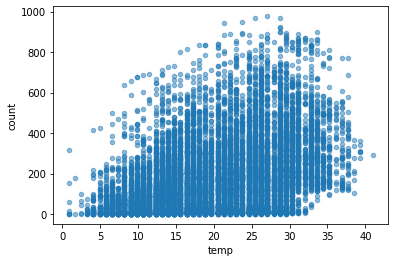

In [ ]:
train.plot(kind="scatter", x ='temp', y = 'count', alpha = 0.5) # 온도와 count간의 관계 plotting

## 데이터 전처리 및 시각화

#### 체감온도 vs 기온의 상관 관계

참고) 체감온도 계산법

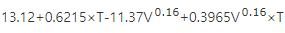
T = 온도 , V = 지상 10m에서의 풍속

온도와 체감온도는 식에서 보듯 서로 상관관계가 있고, 온도가 높으면 체감온도가 높아지는 일반적인 특성을 갖고 있기에 두 특성 중 체감온도의 특성을 삭제하여 데이터를 분석하기로 한다.

In [ ]:
corr_matrix = train.corr() # 온도와 체감온도는 98% 이상의 상관관계를 보임.
corr_matrix["atemp"].sort_values(ascending=False)

atemp         1.000000
temp          0.984948
casual        0.462067
count         0.389784
registered    0.314635
season        0.264744
workingday    0.024660
holiday      -0.005215
humidity     -0.043536
weather      -0.055376
windspeed    -0.057473
Name: atemp, dtype: float64

In [ ]:
# 체감온도 column 삭제
train.drop('atemp', axis = 1, inplace = True)

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129


In [ ]:
# 체감온도 column 삭제(test 동일)
test.drop('atemp', axis = 1, inplace = True)
test

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,56,11.0014
...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,56,8.9981


#### count와 다른 특성 간의 상관 관계
count = casual(일일 회원 - 미등록 회원) + registered(정규 회원 - 등록 회원)

위의 식에 의해 count가 산출되며, 나중에 회원의 이용률, 비회원 이용률을 알아보기 위하여 따로 특성을 삭제하진 않을 예정이다.

#### 데이터 변환
* count와 연관이 있다고 보여지는 뚜렷한 상관관계가 발견되지 않음.
* 그래서, datetime을 object형식에서 int형식으로 변환하여 시간대별 이용객수 현황을 파악해보려함.

In [ ]:
import datetime 

train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [ ]:
train.shape # datetime부분을 연/월/일/시로 표현하여 11+4개 더해짐

(10886, 15)

In [ ]:
train.head() # 특성 추가된 것 확인

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,2011,1,1,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   casual      10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  count       10886 non-null  int64         
 11  year        10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(12)
memory usage: 1.2 MB


In [ ]:
# datetime을 년/월/일/시로 분리시켰기 때문에 더이상 필요 없는 column이라고 판단하여 datetime drop
train.drop(['datetime'], axis = 1, inplace = True)

In [ ]:
import datetime 

test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [ ]:
test.shape

(6493, 12)

In [ ]:
# datetime을 년/월/일/시로 분리시켰기 때문에 더이상 필요 없는 column이라고 판단하여 datetime drop
test.drop(['datetime'], axis = 1, inplace = True)

1월이 봄으로 기입되어있는거 발견하여 자료 변환 필요

In [ ]:
# 계절 분류
def change_season(month):
  if month in [12,1,2]:
    return 4
  elif month in [3,4,5]:
    return 1
  elif month in [6,7,8]:
    return 2
  else:
    return 3

train['season'] = train.month.apply(change_season) #train에 적용
test['season'] = test.month.apply(change_season) # test에 적용

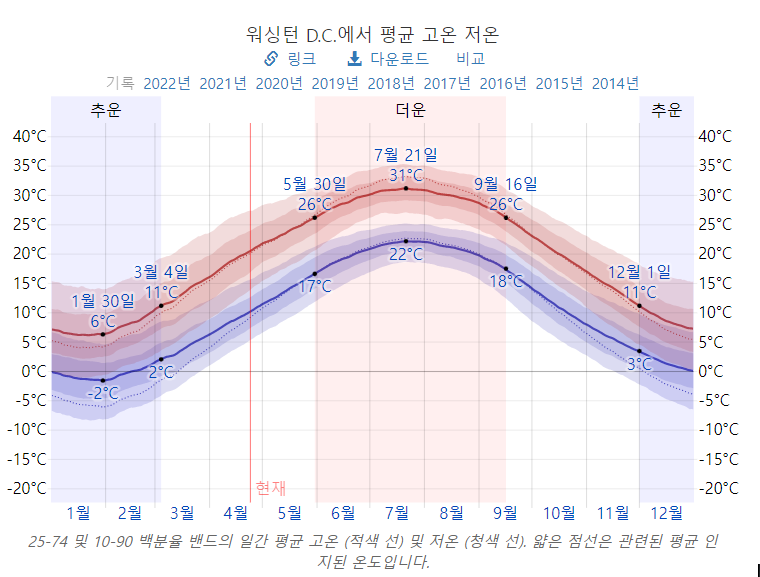

### 계절과 상관관계 파악

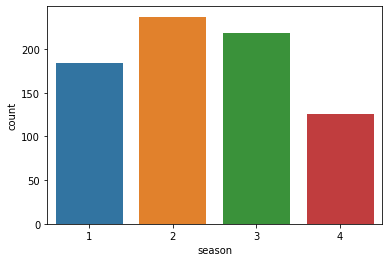

In [ ]:
ax2 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())
# 여름에 가장 이용량이 많고, 겨울에 대여량이 적음을 확인할 수 있음.

## Data Visualization

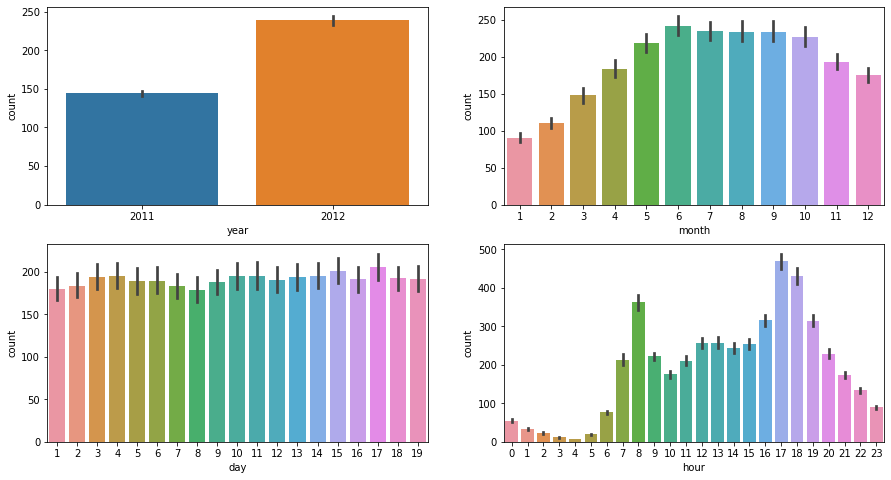

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols = 2)
figure.set_size_inches(15,8)

sns.barplot(data = train, x='year', y= 'count', ax = ax1)
sns.barplot(data = train, x='month', y= 'count', ax = ax2)
sns.barplot(data = train, x='day', y= 'count', ax = ax3)
sns.barplot(data = train, x='hour', y= 'count', ax = ax4)

[plot통해 알 수 있는 부분]
1. 2011년보다 2012년 자전거 대여량이 많았다 -> 늘어나는 추세다.
2. 평균적으로 6~9월에 자전거 이용량이 많고, 10월 이후부터는 자전거 이용량이 감소하다가, 1월의 자전거 대여량이 최소점을 찍으면 점차 증가하는 추세를 보인다.
3. 일일 이용량은 특별히 높고 낮은구간이 보이지 않는다.
4. 시간대별 이용현황은 출/퇴근 시간때에 가장 이용량이 많다. 또한, 출근 시간보다는 퇴근 시간에 더 많이 이용한다.

* weather: 
    1. 맑음, 거의 없음 구름, 약간 흐림, 약간 흐림
    2. 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간 구름, 안개
    3. 약한 눈, 약한 비 + 뇌우 + 산발적 구름, 가벼운 비 + 산발적인 구름
    4. 큰 비 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 

* 3번보다 4번의 경우 더 높게 나옴. 신뢰도 이상

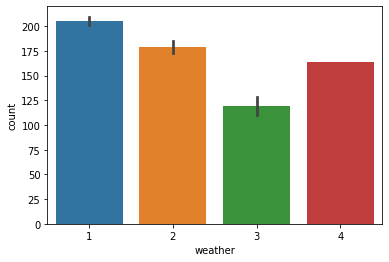

In [ ]:
sns.barplot(data = train, x='weather', y='count')

In [ ]:
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


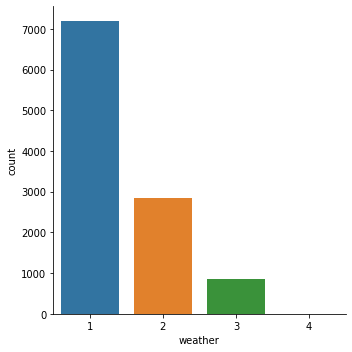

In [ ]:
sns.factorplot(x='weather',data=train,kind='count',size=5,aspect=1)  

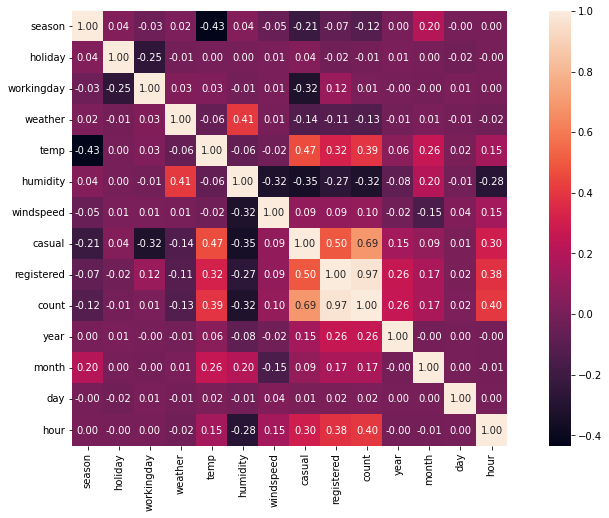

In [ ]:
# 히트맵을 이용하여 상관관계 파악
corr = train.corr()
plt.subplots(figsize = (15,8))
sns.heatmap(corr, annot=True, fmt='.2f', vmax = 1, square = True)

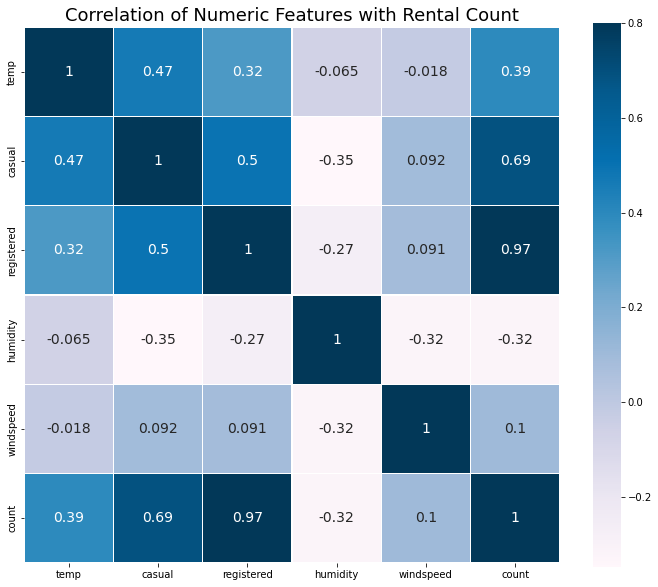

In [ ]:
corr_data = train[["temp", "casual", "registered", "humidity", "windspeed", "count"]]
colormap = plt.cm.PuBu 
f , ax = plt.subplots(figsize = (12,10)) 
plt.title('Correlation of Numeric Features with Rental Count',y=1,size=18) 
sns.heatmap(corr_data.corr(), vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",annot_kws = {'size':14})

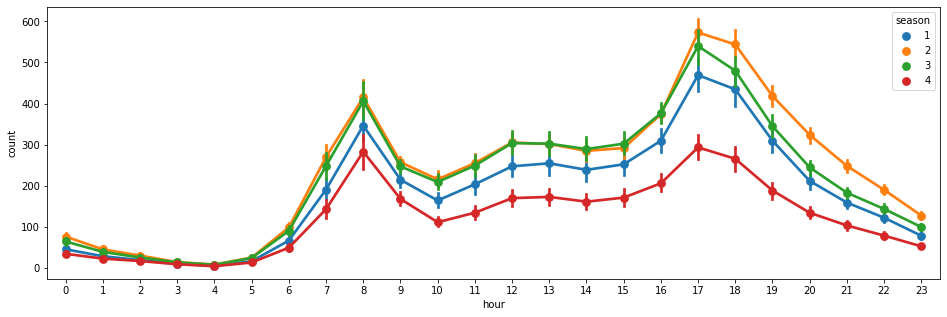

In [ ]:
plt.figure(figsize = (16,5))
sns.pointplot(data=train, x = 'hour', y = 'count', hue = 'season')
# 출/퇴근 시간에 가장 많은 대여량을 보인다(계절적 특성과 상관 없다).

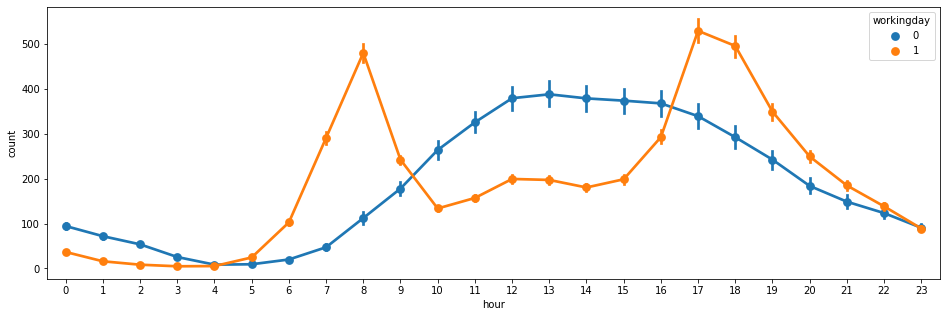

In [ ]:
plt.figure(figsize = (16,5))
sns.pointplot(data=train, x = 'hour', y = 'count', hue = 'workingday')
# 일하는 때에는 출/퇴근 시간에 집중되어 있지만, 일을 하지 않을 때에는 낮시간에 많은 대여량을 보인다.

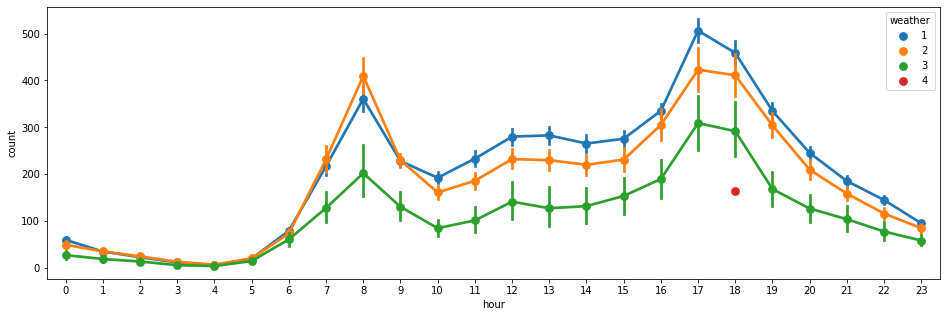

In [ ]:
plt.figure(figsize = (16,5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')
# 평균적으로 날씨가 좋을 때 많이 타는 특성을 보인다. 
# 다만 눈이 쏟아지는 날에 우산이 없어서 우산 없을때 자전거를 빌려탔나보다.(18시)

## feature Engineering

In [ ]:
# One_hot_encoding
train = pd.get_dummies(train, columns = ["weather"], prefix = "weather") 
test = pd.get_dummies(test, columns = ["weather"], prefix = "weather") 
train = pd.get_dummies(train, columns = ["season"], prefix = "season") 
test = pd.get_dummies(test, columns = ["season"], prefix = "season")

In [ ]:
train.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'year', 'month', 'day', 'hour', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [ ]:
# count 열에서 이상치가 있음을 확인
trainWithtoutOutlier = train[np.abs(train["count"]-train["count"].mean()) <=(3*train["count"].std())]

In [ ]:
print ("Shape Of The Before Ouliers: ",train.shape)
print ("Shape Of The After Ouliers: ",trainWithtoutOutlier.shape) # 145개 제거

Shape Of The Before Ouliers:  (10886, 20)
Shape Of The After Ouliers:  (10739, 20)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('count',axis=1),train['count'],test_size=0.25,random_state=42)

In [ ]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [ ]:
models=[RandomForestRegressor(),SVR(), KNeighborsRegressor()]
model_names=['RandomForestRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor', 'SVR', 'KNeighborsRegressor'],
 'RMSLE': [0.016140498736463567, 1.145982744720661, 0.13331537762948004]}

In [ ]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.016140
1,SVR,1.145983
2,KNeighborsRegressor,0.133315


멀라

In [ ]:
regr = RandomForestRegressor(max_depth=4, random_state=531,
                          n_estimators=150)
regr.fit(x_train, y_train)
prediction = regr.predict(x_test)
print(mean_squared_error(y_test, prediction))
featureImportance = regr.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, wineNames[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


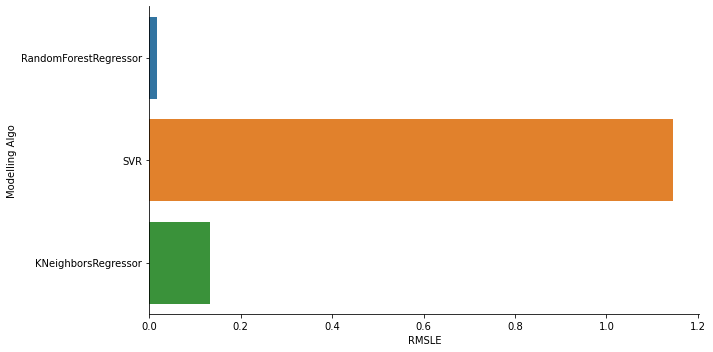

In [ ]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


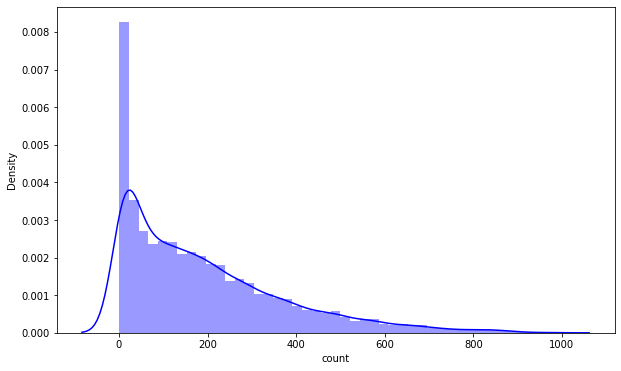

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(train["count"], color = "b")
# 0에 많이 치우친 것을 확인 -> log scaling을 통해 정규화 진행

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


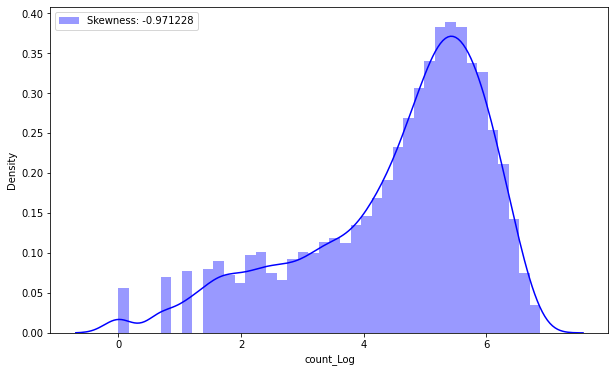

In [ ]:
train["count_Log"] = train["count"].map(lambda i:np.log(i) if i>0 else 0) 
f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(train["count_Log"], color = "b", label="Skewness: {:2f}".format(train["count_Log"].skew()), ax=ax) 
g = g.legend(loc = "best") 

# train.drop('count', axis= 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

X_train = train.drop("count_Log", axis = 1).values  # count_log를 제외한 나머지 변수를 X_train에 넣음
target_label = train["count_Log"].values # count_log 값들을 target_label에 저장
X_test = test.values 
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2, random_state = 2000)

windspeed의 경우 0인 경우가 흔치 않음. null 데이터를 0으로 대체한게 아닐까? 하는 생각에
windspeed의 0인 값 조정

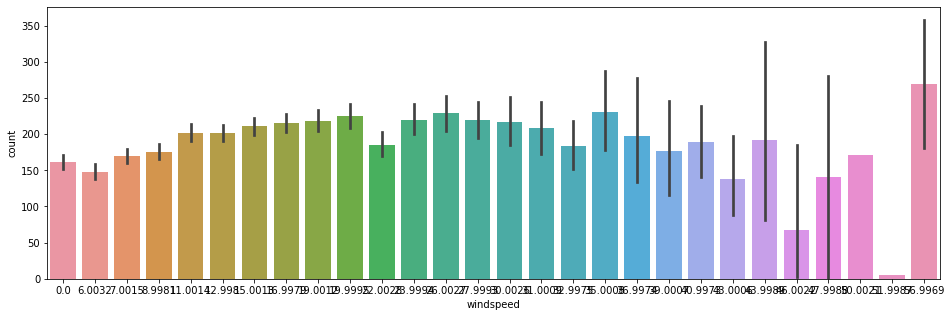

In [ ]:
plt.figure(figsize = (16,5))
sns.barplot(data = train, x = 'windspeed', y = 'count')

In [ ]:
trainWind0 = train.loc[train["windspeed"] == 0] #풍속이 0인 애들
trainWindNot0 = train.loc[train["windspeed"] != 0] # 풍속이 0이 아닌 애들

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

def predict_windspeed(data): # 함수 정의
    dataWind0 = data.loc[data["windspeed"] == 0] 
    dataWindNot0 = data.loc[data["windspeed"] != 0] 
    
    wcol = ["season", "weather", "humidity", 'day', "temp"] # 코드에는 atemp가 추가되어 있으나, 여기서는  생략 
    # 날씨에 관하여 독립적이므로, 관련 변수들을 독립 변수로 사용

    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str") 

    rf_wind = RandomForestClassifier() # 랜덤포레스트 사용하여 예측하고 학습 진행
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"]) 
    wind0 = rf_wind.predict(X=dataWind0[wcol]) 
    
    predictWind0 = dataWind0 
    predictWindNot0 = dataWindNot0 
    predictWind0["windspeed"] = wind0 

    data = predictWindNot0.append(predictWind0)
    data["windspeed"] = data["windspeed"].astype("float") 

    data.reset_index(inplace = True) 
    data.drop("index", inplace = True, axis = 1) 
    return data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

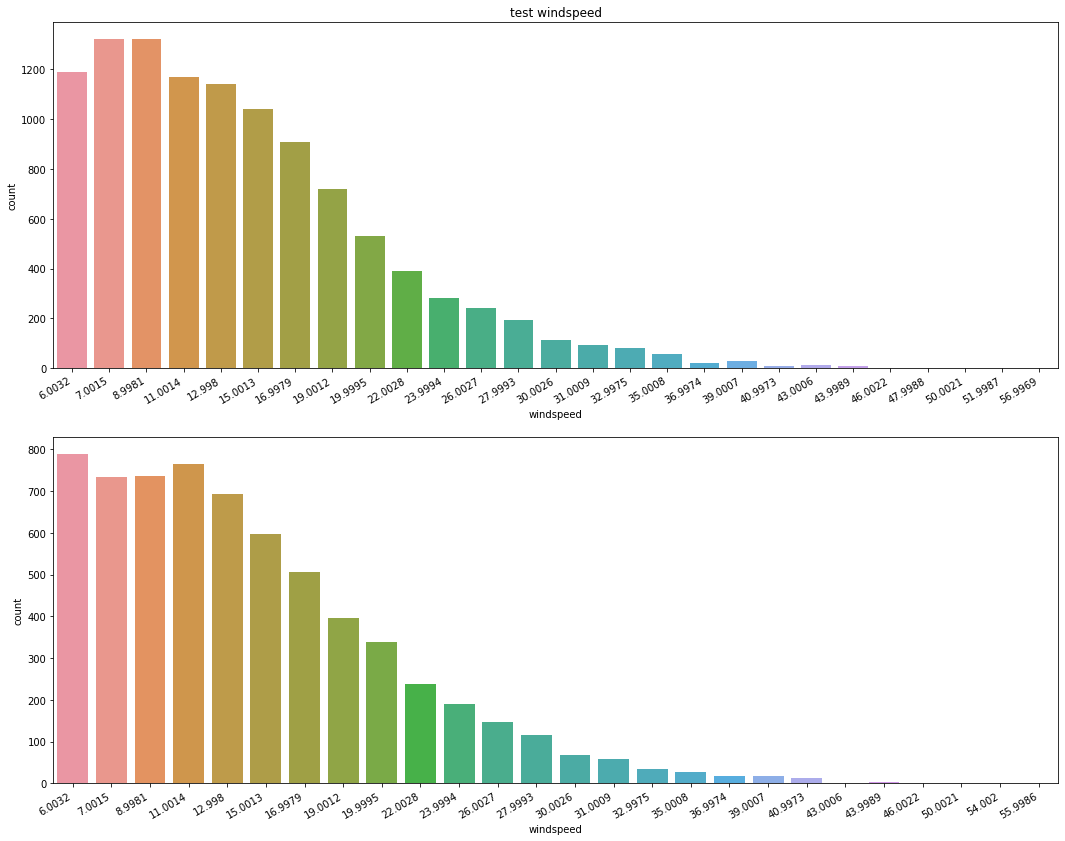

In [ ]:
train = predict_windspeed(train) 
test = predict_windspeed(test) 
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,14))

plt.sca(ax1) 
plt.xticks(rotation = 30, ha = "right") 
ax1.set(ylabel = "count", title = "train windspeed") 
sns.countplot(data = train, x = "windspeed", ax = ax1) 

plt.sca(ax2)
plt.xticks(rotation = 30, ha = "right") 
ax1.set(ylabel = "count", title = "test windspeed")
sns.countplot(data = test, x = "windspeed", ax = ax2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 
regressor = GradientBoostingRegressor(n_estimators=2000, 
                                      learning_rate=0.05, max_depth=4, min_samples_leaf=15, 
                                      min_samples_split=10, random_state =42)

regressor.fit(X_tr,y_tr)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

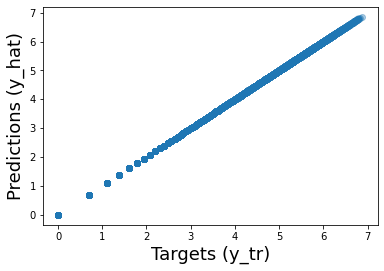

In [ ]:
y_hat = regressor.predict(X_tr) 
plt.scatter(y_tr, y_hat, alpha = 0.2) 
plt.xlabel('Targets (y_tr)',size=18) 
plt.ylabel('Predictions (y_hat)',size=18) 

plt.show()